# 行列因子分解

## 勾配降下法フルスクラッチ

In [428]:
import numpy as np

R = np.array([
    [1, -1, np.nan, np.nan],
    [1, -1, np.nan, 1],
    [1, -1, -1, 1],
    [np.nan, -1, -1, -1],
    [1, np.nan, -1, -1],
    [-1, -1, 1, -1],
    [-1, 1, -1, np.nan]
])
np.random.seed(0)
d = 3
U = np.arange(R.shape[0])
I = np.arange(R.shape[1])
ALPHA = 0.05
THETA = 0.01
LAMBDA = 1

In [429]:
# 欠損値はアイテムの平均値にしてみる
for i in I:
    index = U[np.isnan(R[:,i])]
    R[index, i] = np.nanmean(R[:,i])
R

array([[ 1.        , -1.        , -0.6       , -0.2       ],
       [ 1.        , -1.        , -0.6       ,  1.        ],
       [ 1.        , -1.        , -1.        ,  1.        ],
       [ 0.33333333, -1.        , -1.        , -1.        ],
       [ 1.        , -0.66666667, -1.        , -1.        ],
       [-1.        , -1.        ,  1.        , -1.        ],
       [-1.        ,  1.        , -1.        , -0.2       ]])

In [430]:
# 乱数でユーザ因子行列を初期化
P = np.zeros((7, d))
for u in U:
    for k in range(d):
        P[u,k] = round(np.random.rand(),3)
P

array([[0.549, 0.715, 0.603],
       [0.545, 0.424, 0.646],
       [0.438, 0.892, 0.964],
       [0.383, 0.792, 0.529],
       [0.568, 0.926, 0.071],
       [0.087, 0.02 , 0.833],
       [0.778, 0.87 , 0.979]])

In [431]:
# 乱数でアイテム因子行列を初期化
Q = np.zeros((4, d))
for i in I:
    for k in range(d):
        Q[i,k] = round(np.random.rand(),3)
Q

array([[0.799, 0.461, 0.781],
       [0.118, 0.64 , 0.143],
       [0.945, 0.522, 0.415],
       [0.265, 0.774, 0.456]])

In [432]:
# 予測評価値行列
R2 = P@Q.T
R2

array([[1.239209, 0.608611, 1.14228 , 0.973863],
       [1.135445, 0.428048, 1.004443, 0.767177],
       [1.514058, 0.760416, 1.279594, 1.246062],
       [1.084278, 0.627721, 0.994894, 0.955727],
       [0.936169, 0.669817, 1.049597, 0.89962 ],
       [0.729306, 0.142185, 0.43835 , 0.418383],
       [1.787291, 0.788601, 1.595635, 1.325974]])

In [433]:
# 残差行列
E = R - R2
E

array([[-0.239209  , -1.608611  , -1.74228   , -1.173863  ],
       [-0.135445  , -1.428048  , -1.604443  ,  0.232823  ],
       [-0.514058  , -1.760416  , -2.279594  , -0.246062  ],
       [-0.75094467, -1.627721  , -1.994894  , -1.955727  ],
       [ 0.063831  , -1.33648367, -2.049597  , -1.89962   ],
       [-1.729306  , -1.142185  ,  0.56165   , -1.418383  ],
       [-2.787291  ,  0.211399  , -2.595635  , -1.525974  ]])

In [434]:
# 残差の行列のフロベニウスノルムの二乗
E2_sum = np.sum(E**2)
E2_sum

64.4843459386489

In [435]:
Q.T + 2*ALPHA*np.dot(P.T, E)

array([[ 0.49893815, -0.25699173,  0.27218487, -0.11139721],
       [ 0.09278272,  0.07083942, -0.44642642,  0.21159687],
       [ 0.25207201, -0.38599877, -0.34086862, -0.00795337]])

In [436]:
# L2正則化してない
Ef = []
Ef.append(E2_sum);
for i in range(1, 20):
    P = P + 2*ALPHA*np.dot(E,Q)
    Q = (Q.T + 2*ALPHA*np.dot(P.T, E)).T
    R2 = np.dot(P, Q.T)
    E_sum = np.sum((R - R2)**2) + (LAMBDA/2)*(np.sum(P**2)+np.sum(Q**2)) 
    Ef.append(E_sum)
    if (np.abs(Ef[i-1]-Ef[i]) < THETA):
        break
    print(E_sum)

26.475208327272426
19.33401376897017
25.40682474561352
192.74284991627337
2875.316451455219
43793.29338927354
663827.858432261
10060087.431665292
152556103.9290676
2314542988.6539216
35124632285.1502
533103255632.4307
8091612686814.088
122820164106875.73
1864271144270078.5
2.829766646380633e+16
4.295296266576552e+17
6.519826723890498e+18
9.8964440978416e+19


In [437]:
np.dot(P, Q.T)

array([[-1.22015564e+09, -1.59880802e+09, -2.53589369e+09,
        -1.67088785e+09],
       [-8.09278311e+08, -1.06042548e+09, -1.68195614e+09,
        -1.10823165e+09],
       [-1.27196337e+09, -1.66669439e+09, -2.64356909e+09,
        -1.74183420e+09],
       [-1.56336012e+09, -2.04851595e+09, -3.24918344e+09,
        -2.14087208e+09],
       [-1.37673290e+09, -1.80397554e+09, -2.86131327e+09,
        -1.88530533e+09],
       [-6.43787309e+08, -8.43566409e+08, -1.33799574e+09,
        -8.81601635e+08],
       [-1.60917827e+09, -2.10854235e+09, -3.34439607e+09,
        -2.20361021e+09]])

In [438]:
R

array([[ 1.        , -1.        , -0.6       , -0.2       ],
       [ 1.        , -1.        , -0.6       ,  1.        ],
       [ 1.        , -1.        , -1.        ,  1.        ],
       [ 0.33333333, -1.        , -1.        , -1.        ],
       [ 1.        , -0.66666667, -1.        , -1.        ],
       [-1.        , -1.        ,  1.        , -1.        ],
       [-1.        ,  1.        , -1.        , -0.2       ]])

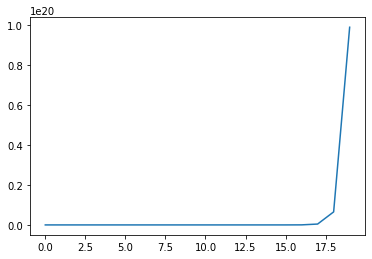

In [439]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(Ef)), Ef)
plt.show()

In [440]:
len(Ef)

20